In [58]:
df = pd.read_csv('housing_sale_cleaned.csv')

In [59]:
df.head()
df.dtypes


house_price         int64
house_location     object
no_bedrooms         int64
no_washrooms        int64
house_type         object
date_renewed       object
total_views         int64
house_town_name    object
house_area_name    object
dtype: object

In [60]:
# df1 = df.drop(columns= ['house_location','date_renewed','house_town_name','house_area_name','house_type'])
df1 = df

In [61]:
df1.shape

(1756, 9)

In [62]:
#removing outliers
df1 = df1[df1.house_price<=1000000]
df1 = df1[df1.no_bedrooms<=7]
df1 = df1[df1.no_washrooms<=7]

In [63]:
for i, rows in df1.iterrows():
#     rows.house_price = rows.house_price.replace(",","")
    df1.at[i,'house_area_name'] = df1.at[i,'house_area_name'].strip()
    df1.at[i,'house_town_name'] = df1.at[i,'house_town_name'].strip()
    df1.at[i,'house_type'] = df1.at[i,'house_type'].strip()

In [64]:
df1["house_area_name"] = df1["house_area_name"].str.replace("Dublin 6w","Dublin 6")

In [65]:
print(df1['house_town_name'].unique())

['Templeogue' 'Terenure' 'Rathfarnham' 'Malahide' 'Lucan' 'Phibsborough'
 'Walkinstown' 'Ashtown' 'Drumcondra' 'Mount Merrion' 'Kiltipper'
 'Tallaght' 'Skerries' 'Inchicore' 'Russell Street' 'Clontarf'
 'Churchtown' 'Castleknock' 'Monkstown' 'Leopardstown' 'Cork Street'
 'Arran Quay' 'Clongriffin' 'Blackrock' 'Clonsilla' 'Dundrum' 'Saggart'
 'Glasnevin' 'Drimnagh' 'Clondalkin' 'Navan Road (D7)'
 '52 Mountjoy Square' 'Tyrrelstown' 'Dalkey' 'Finglas' 'Sandymount'
 'Clanbrassil Terrace' 'Stoneybatter' 'Raheny' 'Hollystown' 'Knocklyon'
 'Portmarnock' 'Donabate' 'Sandyford' 'Rathmines' 'Carrickmines'
 'South Richmond Street' 'Glenageary' 'North Strand' 'Killiney'
 'Ard Na Greine' '3 Dorset Lane' 'Newcastle' 'Dun Laoghaire' 'Beaumont'
 '61 Cork Street' 'Rush' 'Foxrock' 'Marino' 'Chapelizod' 'Ranelagh'
 'Blackhorse Avenue' 'Swords' 'Ballymun' 'Kingswood' 'Kilmainham' 'IFSC'
 'Cabra' 'Ballsbridge' 'Clonskeagh' 'Christchurch' 'Killester'
 'Donnybrook' 'Gardiner Street' 'Islandbridge' 'Grand Can

In [66]:
df1.head()

house_price                                     house_location  \
0       750000             1B Cypress Park, Templeogue, Dublin 6w   
1       650000            123 Whitehall Road, Terenure, Dublin 12   
2       750000      62 Butterfield Avenue, Rathfarnham, Dublin 14   
3       595000  4 Castledowns Croft, Estuary Road, Malahide, C...   
4       315000               21 Oldbridge Park, Lucan, Co. Dublin   

   no_bedrooms  no_washrooms           house_type date_renewed  total_views  \
0            4             3       Detached House   2019-07-25          702   
1            4             2    Bungalow for sale   2019-07-25          309   
2            4             1  Semi-Detached House   2019-07-25         3825   
3            4             3  Semi-Detached House   2019-07-25         2318   
4            3             3  Semi-Detached House   2019-07-26         3965   

  house_town_name house_area_name  
0      Templeogue        Dublin 6  
1        Terenure       Dublin 12  
2     Rathfarnham       Dublin 14  
3        Malahide      Co. Dublin  
4           Lucan      Co. Dublin

In [67]:
df1_encoded = df1.copy()

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
label_make = LabelEncoder()

df1_encoded['area_code'] = label_make.fit_transform(df1['house_area_name'])
df1_encoded['town_code'] = label_make.fit_transform(df1['house_town_name'])
df1_encoded['house_type_code'] = label_make.fit_transform(df1['house_type'])

In [70]:
# print(df1_encoded['house_area_name'].value_counts())
df1_encoded.head()
# df1_encoded.house_type.value_counts()

house_price                                     house_location  \
0       750000             1B Cypress Park, Templeogue, Dublin 6w   
1       650000            123 Whitehall Road, Terenure, Dublin 12   
2       750000      62 Butterfield Avenue, Rathfarnham, Dublin 14   
3       595000  4 Castledowns Croft, Estuary Road, Malahide, C...   
4       315000               21 Oldbridge Park, Lucan, Co. Dublin   

   no_bedrooms  no_washrooms           house_type date_renewed  total_views  \
0            4             3       Detached House   2019-07-25          702   
1            4             2    Bungalow for sale   2019-07-25          309   
2            4             1  Semi-Detached House   2019-07-25         3825   
3            4             3  Semi-Detached House   2019-07-25         2318   
4            3             3  Semi-Detached House   2019-07-26         3965   

  house_town_name house_area_name  area_code  town_code  house_type_code  
0      Templeogue        Dublin 6         18        223                2  
1        Terenure       Dublin 12          4        224                1  
2     Rathfarnham       Dublin 14          6        190                5  
3        Malahide      Co. Dublin          0        146                5  
4           Lucan      Co. Dublin          0        144                5

In [15]:
df1_encoded_test = df1_encoded.drop(columns= ['total_views','house_location','date_renewed','house_town_name','house_area_name','house_type'])
df1_encoded_test.head()

house_price  no_bedrooms  no_washrooms  area_code  town_code  \
0       750000            4             3         18        204   
1       650000            4             2          4        205   
2       750000            4             1          6        172   
3       595000            4             3          0        129   
4       315000            3             3          0        127   

   house_type_code  
0                0  
1                6  
2                2  
3                2  
4                2

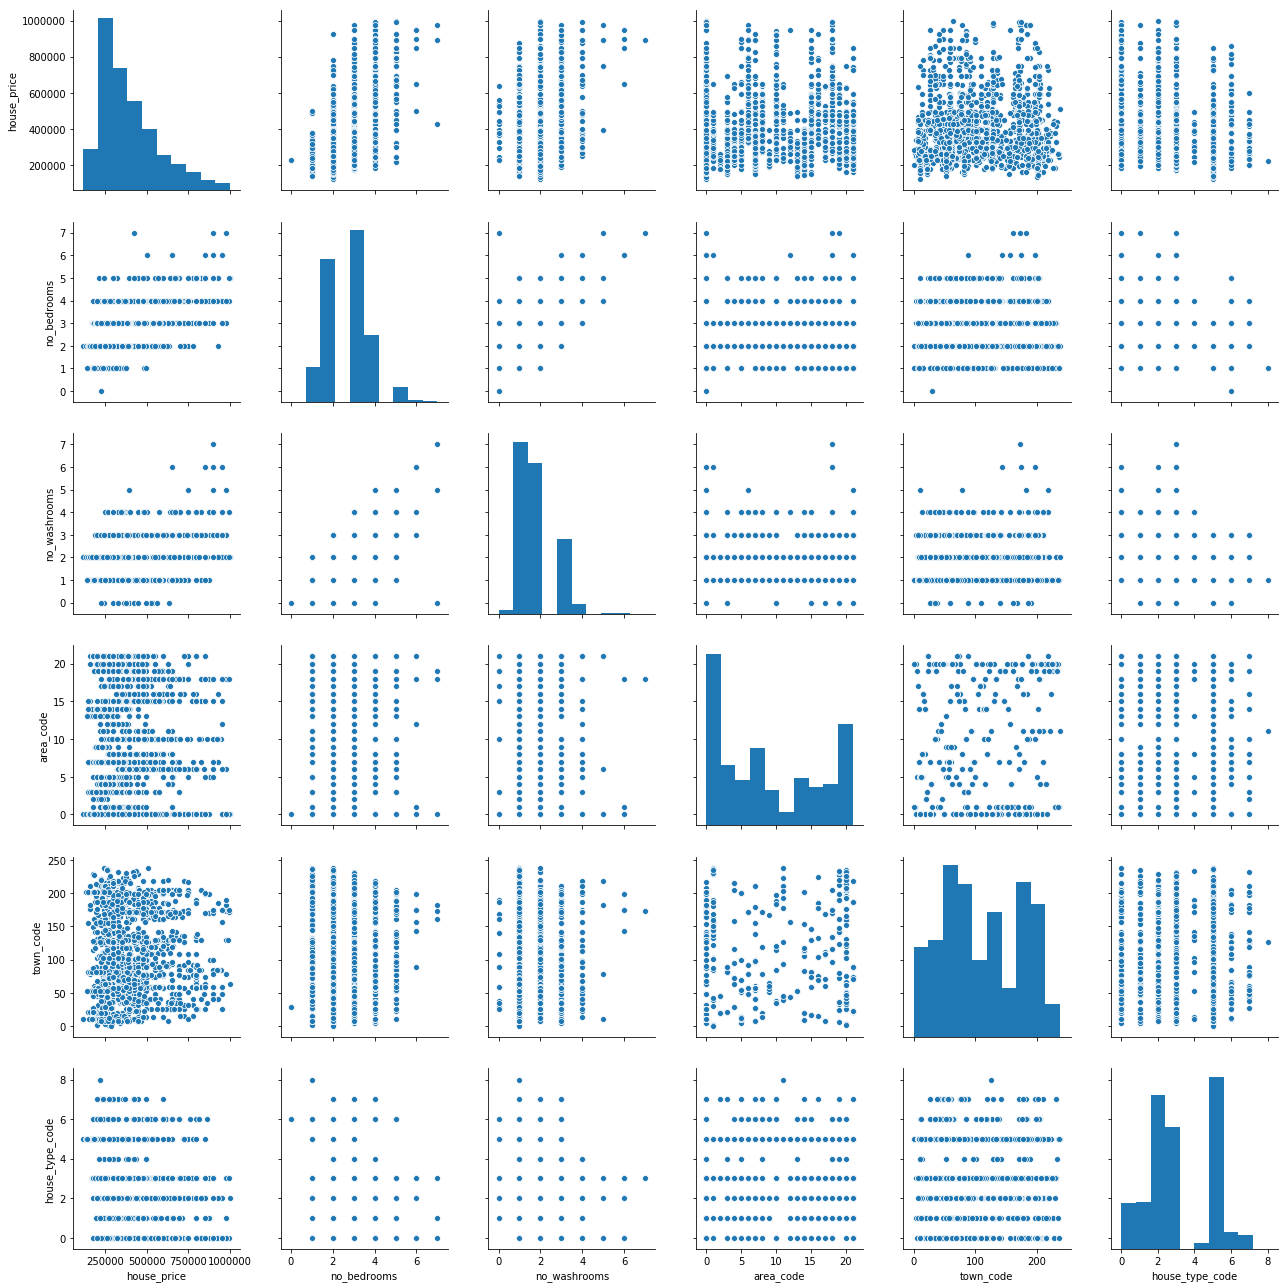

In [16]:
sns.pairplot(df1_encoded_test,height=3)
plt.tight_layout()

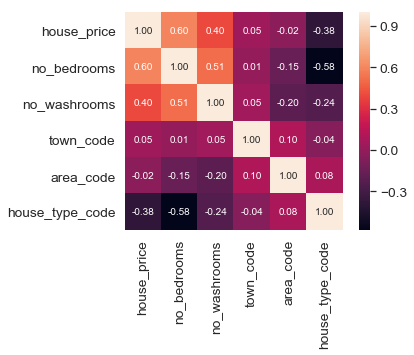

In [17]:
df1_encoded_test.shape
corrmat = df1_encoded_test.corr()
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'house_price')['house_price'].index
cm = np.corrcoef(df1_encoded[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [18]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

Most Correlated Features
0              house_price
1              no_bedrooms
2             no_washrooms
3                town_code
4                area_code
5          house_type_code

In [19]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [20]:
prices = df1_encoded_test['house_price']
features = df1_encoded_test.drop('house_price',axis = 1)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

# Training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor()

    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    grid = grid.fit(X, y)

    return grid.best_estimator_

In [23]:
reg = fit_model(X_train, y_train)

print("max_depth is {} for the best model.".format(reg.get_params()['max_depth']))

max_depth is 9 for the best model.


In [24]:
#R Square value:
reg.score(X_train,y_train)

0.8021429828997252

In [25]:
new_input = [[4,3,18,204,0],
            [4,2,4,205,6],
             [3,3,0,127,2]]

for i, price in enumerate(reg.predict(new_input)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $750,000.00
Predicted selling price for Client 2's home: $650,000.00
Predicted selling price for Client 3's home: $307,141.07
